# download stock data 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tesla = yf.Ticker('TSLA')
tesla = tesla.history(period='max') # tesla 
hundai = yf.Ticker('HYMTF')
hundai = hundai.history(period='max') # hundai
toyota = yf.Ticker('TM')
toyota = toyota.history(period='max') # toyota 
ford = yf.Ticker('F')
ford = ford.history(period='max') # ford 

In [3]:
tesla.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0


## drop unnececary columns 

In [4]:
tesla.drop(columns=['Dividends','Stock Splits'],inplace=True)
hundai.drop(columns=['Dividends','Stock Splits'],inplace=True)
toyota.drop(columns=['Dividends','Stock Splits'],inplace=True)
ford.drop(columns=['Dividends','Stock Splits'],inplace=True)


## lets only keep data from 2020 and on

In [5]:
tesla = tesla.loc['2020-01-01':].copy()
hundai = hundai.loc['2020-01-01':].copy()
toyota = toyota.loc['2020-01-01':].copy()
ford = ford.loc['2020-01-01':].copy()

In [6]:
frames = [tesla,hundai,toyota,ford]
titles = ['tesla','hundai','toyota','ford']

## visualizations 

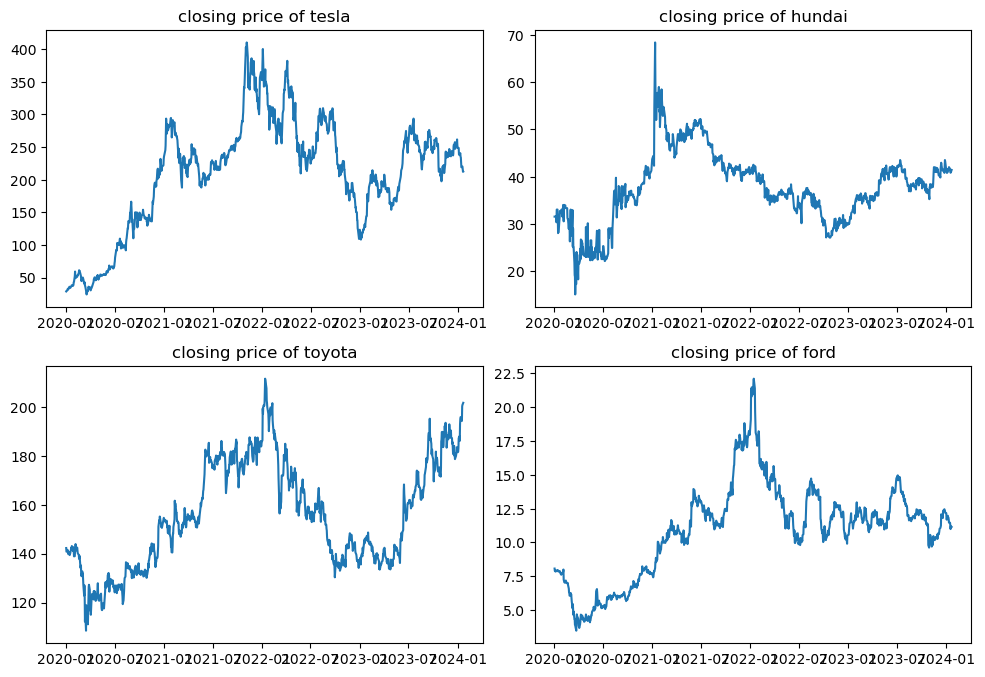

In [7]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(3,2,i+1)
    y = frames[i]['Close'].values
    x = frames[i].index
    plt.plot(x,y)
    plt.title(f'closing price of {titles[i]}')
plt.tight_layout()
plt.show()
        
        

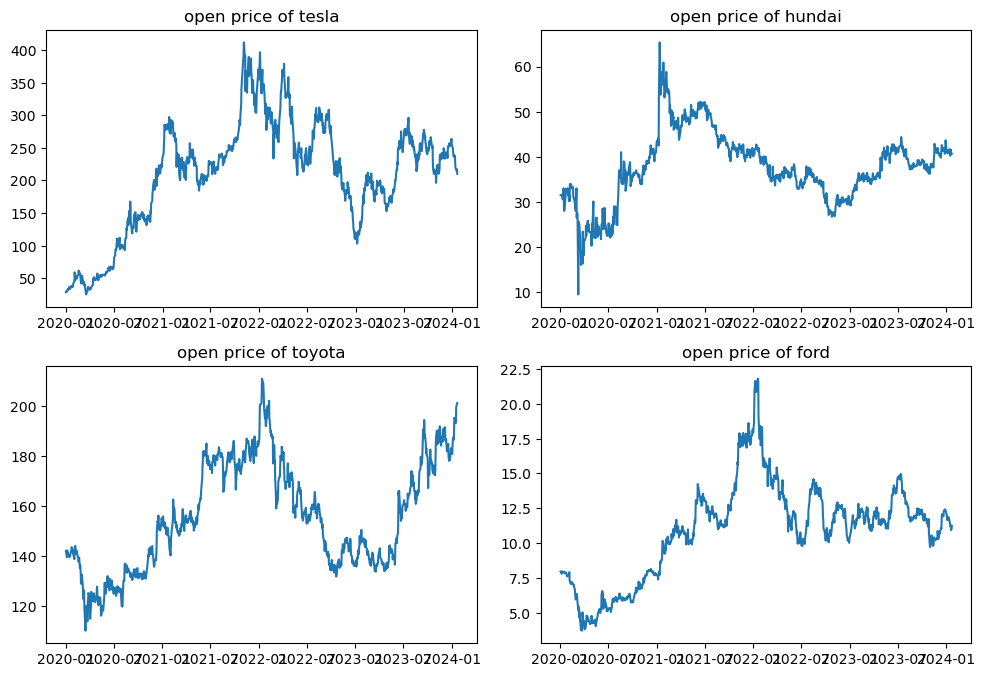

In [8]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(3,2,i+1)
    y = frames[i]['Open'].values
    x = frames[i].index
    plt.plot(x,y)
    plt.title(f'open price of {titles[i]}')
plt.tight_layout()
plt.show()

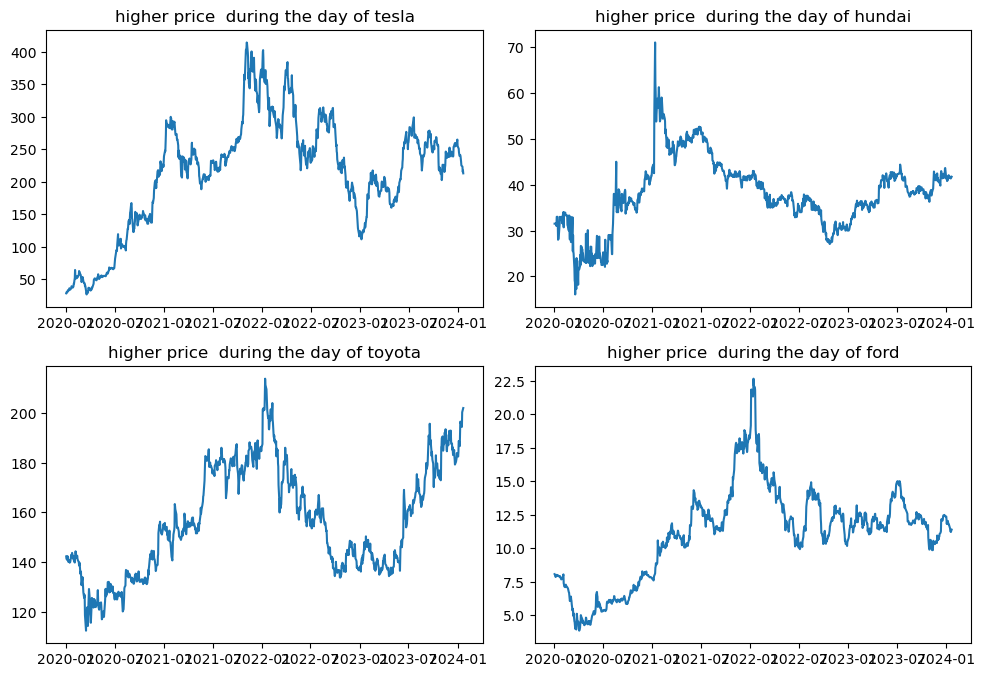

In [9]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(3,2,i+1)
    y = frames[i]['High'].values
    x = frames[i].index
    plt.plot(x,y)
    plt.title(f'higher price  during the day of {titles[i]}')
plt.tight_layout()
plt.show()

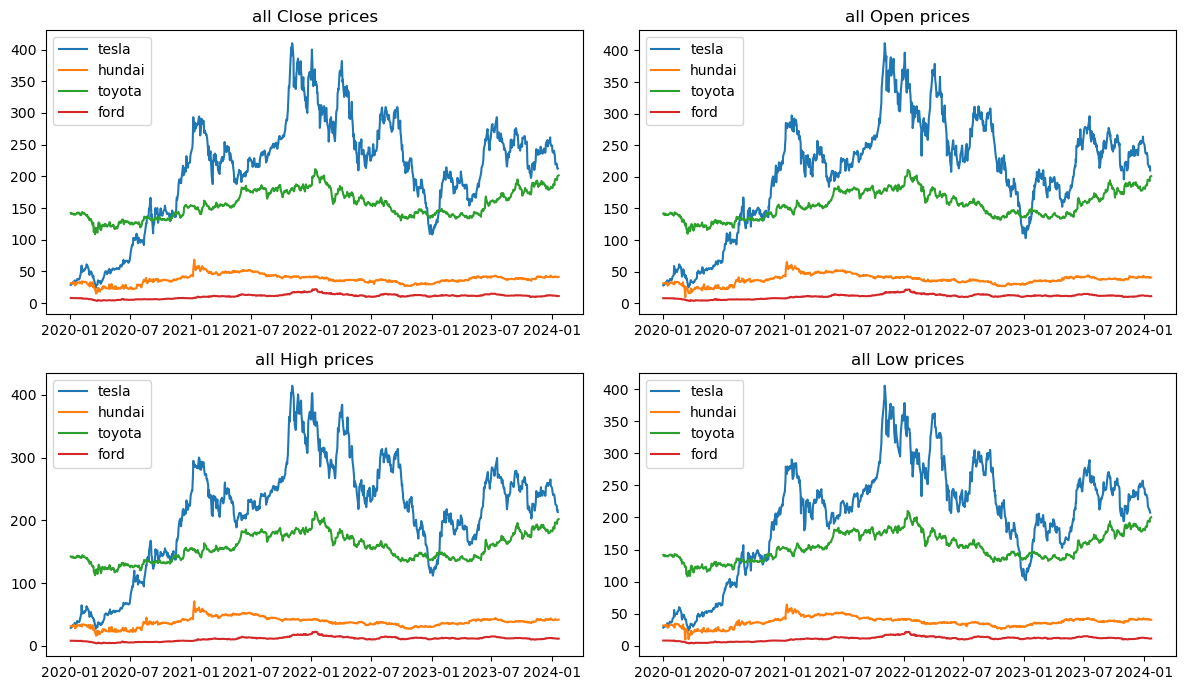

In [10]:
cols_to_plot = ['Close','Open','High','Low']
plt.figure(figsize=(12,7))
for j in range(4):
    plt.subplot(2,2,j+1)
    for i in range(len(frames)):
        plt.plot(frames[i][cols_to_plot[j]],label=f'{titles[i]}')
    plt.title(f'all {cols_to_plot[j]} prices')
    plt.legend()
    
plt.tight_layout()
plt.show()


## get day and month for each row 

In [11]:
for i in range(len(frames)): # get day 
    days = frames[i].index.day_name()
    frames[i]['day'] = days

for i in range(len(frames)): # get month 
    month = frames[i].index.month
    frames[i]['month'] = month

<Axes: title={'center': 'plot of maxes per day'}, xlabel='day'>

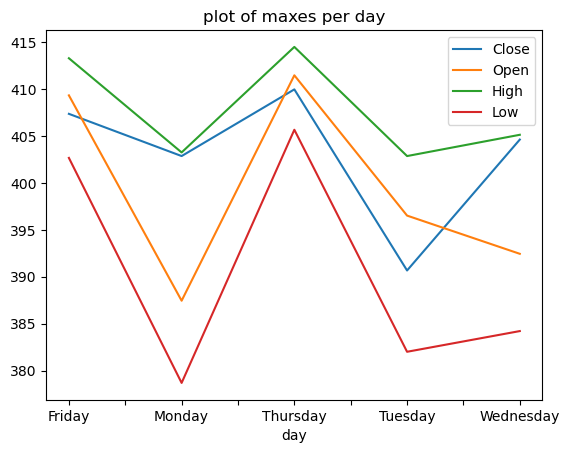

In [12]:
tesla.groupby('day').max()[['Close','Open','High','Low']].plot(kind='line',title='plot of maxes per day')

<Axes: title={'center': 'plot of maxes per month'}, xlabel='month'>

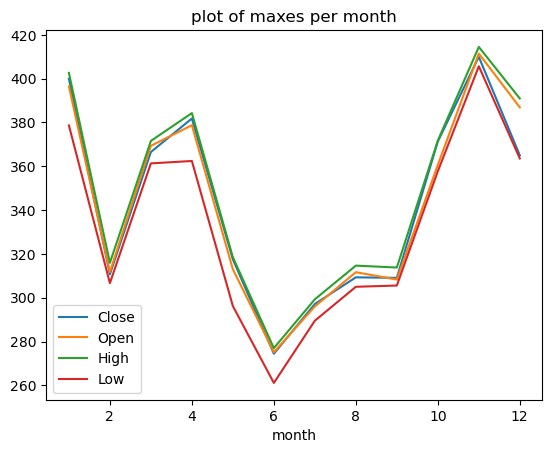

In [13]:
tesla.groupby('month').max()[['Close','Open','High','Low']].plot(kind='line',title='plot of maxes per month')

## volume 

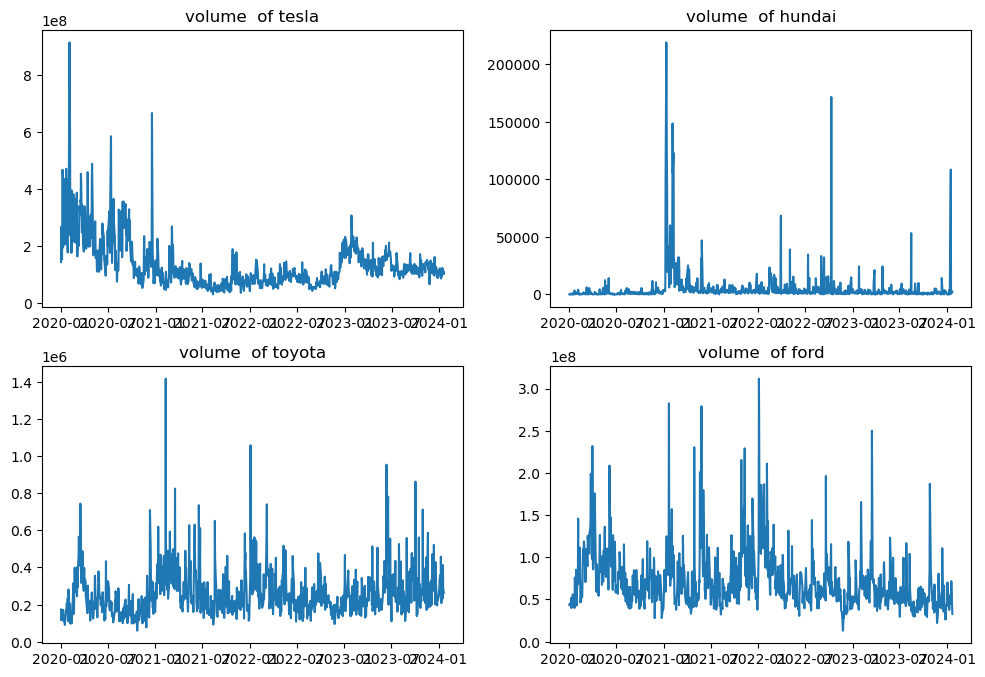

In [14]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(3,2,i+1)
    y = frames[i]['Volume'].values
    x = frames[i].index
    plt.plot(x,y)
    plt.title(f'volume  of {titles[i]}')
plt.tight_layout()
plt.show()

## create a row as the diferent percentage of the next day 

In [15]:
for frame in range(len(frames)):
        
    frames[frame]['next_day'] = frames[frame]['Close'].shift(-1) # get the next_days closing price 
    
    diference = frames[frame]['next_day'] - frames[frame]['Close'] # get the diference 
    
    percent = round(diference / frames[frame]['Close'].values * 100,2) # make the percent 
    
    frames[frame]['percent_change'] = percent # save it 
    

    

## print the percent increasment  

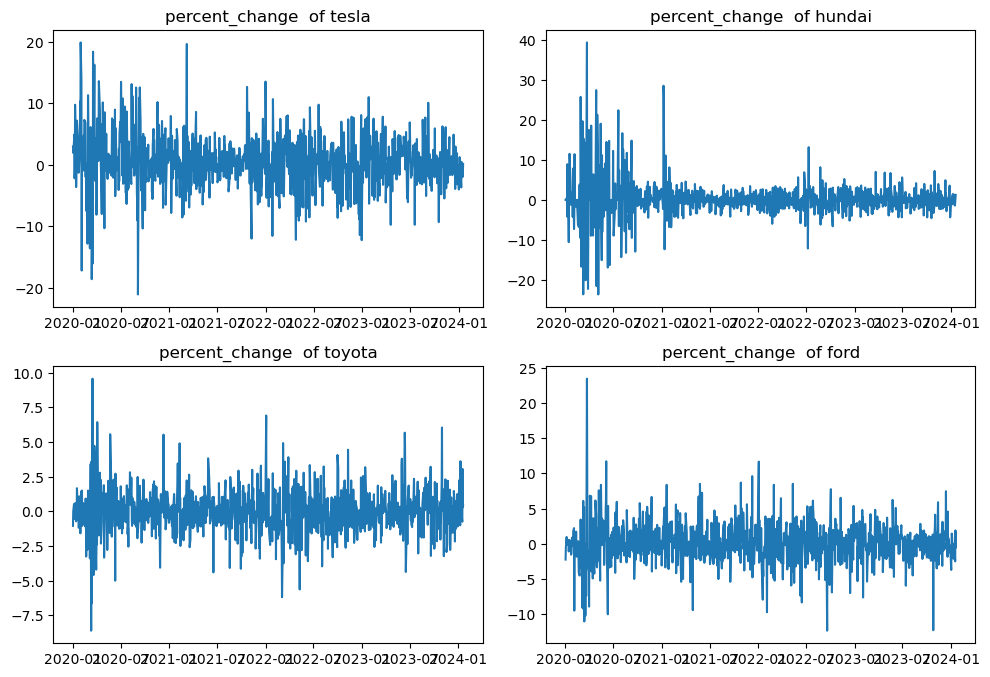

In [17]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(3,2,i+1)
    y = frames[i]['percent_change'].values
    x = frames[i].index
    plt.plot(x,y)
    plt.title(f'percent_change  of {titles[i]}')
plt.tight_layout()
plt.show()